In [199]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mstats
%matplotlib inline

In [281]:
code_list = ['CLIP_35L33G','PolyA_siLin28a','PolyA_siLuc','PolyA_untreat','RPF_siLin28a','RPF_siLuc']

In [155]:
def sam_to_table(code):
    read_table = defaultdict(int)
    with open(f"alignment/{code}/Aligned.out.sam") as inpfile:
        for line in inpfile:
            if line.startswith('@'): continue # header 제거
        
            line_list = line.split()
            if line_list[1]==4: continue # 잘못 read된 data 제거
        
            if line_list[2].startswith('ENSMUST'):
                read_table[line_list[2].split('|')[1]]+=1
            
    table_df = pd.Series(read_table)
    return table_df[table_df>= 30] # 30 read 보다 작은 경우는 filter

In [156]:
total_table = sam_to_table(code_list[0])
print(code_list[0], 'fin')
for code in code_list[1:]:
    total_table = pd.concat([total_table, sam_to_table(code)], axis=1)
    print(code, 'fin')

total_table.columns = code_list
total_table.head()

CLIP_35L33G fin
PolyA_siLin28a fin
PolyA_siLuc fin
PolyA_untreat fin
RPF_siLin28a fin
RPF_siLuc fin


,CLIP_35L33G,PolyA_siLin28a,PolyA_siLuc,PolyA_untreat,RPF_siLin28a,RPF_siLuc
ENSMUSG00000020706.14,14086.0,9134.0,8368.0,9741.0,354.0,5279.0
ENSMUSG00000035078.7,1185.0,753.0,586.0,879.0,86.0,610.0
ENSMUSG00000047126.18,20512.0,38687.0,30964.0,31553.0,1804.0,28129.0
ENSMUSG00000087166.10,17156.0,14536.0,17107.0,15248.0,397.0,8451.0
ENSMUSG00000052727.7,5178.0,4306.0,3384.0,4707.0,362.0,4915.0


In [175]:
total_table.dropna(inplace=True)
backup_table = total_table

In [179]:
# EXTENDED EXPERIMENTAL PROCEDURES를 참고하여 RPF에 대해 추가 filtering
total_table = total_table[total_table['RPF_siLin28a']>=80]
total_table = total_table[total_table['RPF_siLuc']>=80]

In [244]:
x_axis = np.log2(total_table['CLIP_35L33G']) - np.log2(total_table['PolyA_untreat'])
y_axis = np.log2(total_table['RPF_siLin28a']) + np.log2(total_table['PolyA_siLuc']) - np.log2(total_table['RPF_siLuc']) -np.log2(total_table['PolyA_siLin28a']) 
x_axis, y_axis

(ENSMUSG00000020706.14    0.532120
 ENSMUSG00000035078.7     0.430952
 ENSMUSG00000047126.18   -0.621309
 ENSMUSG00000087166.10    0.170093
 ENSMUSG00000052727.7     0.137587
                            ...   
 ENSMUSG00000002871.15   -2.769880
 ENSMUSG00000069439.4    -2.427606
 ENSMUSG00000022756.18   -0.267622
 ENSMUSG00000109663.2    -2.187627
 ENSMUSG00000068220.7    -2.909355
 Length: 6177, dtype: float64,
 ENSMUSG00000020706.14   -4.024807
 ENSMUSG00000035078.7    -3.188150
 ENSMUSG00000047126.18   -4.284044
 ENSMUSG00000087166.10   -4.176955
 ENSMUSG00000052727.7    -4.110749
                            ...   
 ENSMUSG00000002871.15   -3.840125
 ENSMUSG00000069439.4    -3.173691
 ENSMUSG00000022756.18   -4.043982
 ENSMUSG00000109663.2    -2.648100
 ENSMUSG00000068220.7    -2.840768
 Length: 6177, dtype: float64)

Text(2.15, -4.85, 'r = 0.4612')

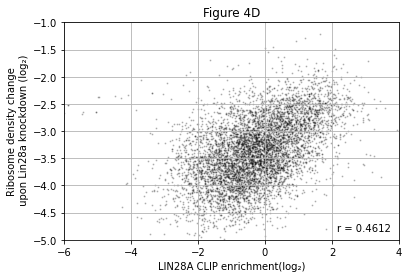

In [247]:
plt.scatter(x_axis,y_axis, s = 1, alpha = .2, color = 'black')
plt.title('Figure 4D')
plt.grid()
plt.xlabel('LIN28A CLIP enrichment(log\u2082)')
plt.ylabel('Ribosome density change\n upon Lin28a knockdown (log\u2082)')
plt.xlim([-6,4])
plt.ylim([-5,-1])
coef = mstats.pearsonr(x_axis, y_axis)
plt.text(2.15,-4.85, f'r = {round(coef[0],4)}')

In [288]:
def sam_to_table2(code):
    read_table = defaultdict(int)
    with open(f"alignment/{code}/Aligned.out.sam") as inpfile:
        for line in inpfile:
            if line.startswith('@'): continue # header 제거
            line_list = line.split()
            if line_list[1]==4: continue # 잘못 read된 data 제거
            
            if line_list[2].startswith('ENSMUST'):
                read_table[line_list[2].split('|')[0][:18]]+=1
            
    table_df = pd.Series(read_table, dtype=int)
    return table_df[table_df>= 30] # 30 read 보다 작은 경우는 filter

In [289]:
total_table2 = sam_to_table2(code_list[0])
print(code_list[0], 'fin')
for code in code_list[1:]:
    total_table2 = pd.concat([total_table2, sam_to_table2(code)], axis=1)
    print(code, 'fin')

total_table2.columns = code_list
total_table2.head()

CLIP_35L33G fin
PolyA_siLin28a fin
PolyA_siLuc fin
PolyA_untreat fin
RPF_siLin28a fin
RPF_siLuc fin


,CLIP_35L33G,PolyA_siLin28a,PolyA_siLuc,PolyA_untreat,RPF_siLin28a,RPF_siLuc
ENSMUST00000021048,9181.0,5921.0,5522.0,6085.0,199.0,3031.0
ENSMUST00000058679,1044.0,630.0,493.0,748.0,81.0,551.0
ENSMUST00000103186,9156.0,16473.0,13270.0,13798.0,782.0,12253.0
ENSMUST00000060766,9029.0,16378.0,13129.0,13709.0,776.0,12166.0
ENSMUST00000154279,8955.0,7003.0,8122.0,7338.0,158.0,3284.0


In [293]:
total_table2.dropna(inplace=True)
total_table2.index

Index(['ENSMUST00000021048', 'ENSMUST00000058679', 'ENSMUST00000103186',
       'ENSMUST00000060766', 'ENSMUST00000154279', 'ENSMUST00000064762',
       'ENSMUST00000224702', 'ENSMUST00000223693', 'ENSMUST00000044260',
       'ENSMUST00000189257',
       ...
       'ENSMUST00000139498', 'ENSMUST00000220249', 'ENSMUST00000206361',
       'ENSMUST00000206628', 'ENSMUST00000129166', 'ENSMUST00000217513',
       'ENSMUST00000174491', 'ENSMUST00000210610', 'ENSMUST00000122119',
       'ENSMUST00000002737'],
      dtype='object', length=19304)

In [294]:
total_table2['x_axis'] = np.log2(total_table2['CLIP_35L33G']) - np.log2(total_table2['PolyA_untreat'])
total_table2['y_axis'] = np.log2(total_table2['RPF_siLin28a']) + np.log2(total_table2['PolyA_siLuc']) - np.log2(total_table2['RPF_siLuc']) -np.log2(total_table2['PolyA_siLin28a']) 
total_table2.head()

,CLIP_35L33G,PolyA_siLin28a,PolyA_siLuc,PolyA_untreat,RPF_siLin28a,RPF_siLuc,x_axis,y_axis
ENSMUST00000021048,9181.0,5921.0,5522.0,6085.0,199.0,3031.0,0.593394,-4.029603
ENSMUST00000058679,1044.0,630.0,493.0,748.0,81.0,551.0,0.481012,-3.119823
ENSMUST00000103186,9156.0,16473.0,13270.0,13798.0,782.0,12253.0,-0.591670,-4.281758
ENSMUST00000060766,9029.0,16378.0,13129.0,13709.0,776.0,12166.0,-0.602485,-4.289657
ENSMUST00000154279,8955.0,7003.0,8122.0,7338.0,158.0,3284.0,0.287307,-4.163596


In [320]:
GO_table = defaultdict(int)
with open("gene_ontology.tab") as inpfile:
        for line in inpfile:
            if line.startswith('Entry'): continue # header 제거
            line_list = line.split('\t')
            if line_list[2][:18] in total_table2.index:
                if line_list[3].find('0031966')!=-1: continue
                if line_list[3].find('0005634')!=-1: GO_table[line_list[2][:18]]=1 # nucleus
                if line_list[3].find('0016021')!=-1: GO_table[line_list[2][:18]]=2 # integral membrane
                if line_list[3].find('0005737')!=-1: GO_table[line_list[2][:18]]=3 # cytoplasm
GO_df = pd.Series(GO_table)
GO_df

ENSMUST00000031587    1
ENSMUST00000141116    3
ENSMUST00000027837    2
ENSMUST00000032216    1
ENSMUST00000034030    2
                     ..
ENSMUST00000028335    3
ENSMUST00000038775    3
ENSMUST00000034510    2
ENSMUST00000043313    3
ENSMUST00000075447    2
Length: 5048, dtype: int64

In [324]:
fin_table = pd.concat([total_table2,GO_df], axis=1)

In [327]:
fin_table.head()

,CLIP_35L33G,PolyA_siLin28a,PolyA_siLuc,PolyA_untreat,RPF_siLin28a,RPF_siLuc,x_axis,y_axis,0
ENSMUST00000021048,9181.0,5921.0,5522.0,6085.0,199.0,3031.0,0.593394,-4.029603,NaN
ENSMUST00000058679,1044.0,630.0,493.0,748.0,81.0,551.0,0.481012,-3.119823,3.0
ENSMUST00000103186,9156.0,16473.0,13270.0,13798.0,782.0,12253.0,-0.591670,-4.281758,NaN
ENSMUST00000060766,9029.0,16378.0,13129.0,13709.0,776.0,12166.0,-0.602485,-4.289657,NaN
ENSMUST00000154279,8955.0,7003.0,8122.0,7338.0,158.0,3284.0,0.287307,-4.163596,NaN


In [332]:
N_table, I_table, C_table = fin_table[fin_table[0]==1], fin_table[fin_table[0]==2], fin_table[fin_table[0]==3]
C_table

,CLIP_35L33G,PolyA_siLin28a,PolyA_siLuc,PolyA_untreat,RPF_siLin28a,RPF_siLuc,x_axis,y_axis,0
ENSMUST00000058679,1044.0,630.0,493.0,748.0,81.0,551.0,0.481012,-3.119823,3.0
ENSMUST00000122941,1813.0,1530.0,1248.0,1771.0,73.0,935.0,0.033815,-3.972912,3.0
ENSMUST00000041047,8924.0,1017.0,781.0,1204.0,346.0,1014.0,2.889855,-1.932139,3.0
ENSMUST00000018727,6427.0,15528.0,12787.0,15155.0,343.0,5107.0,-1.237576,-4.176390,3.0
ENSMUST00000035086,1034.0,1823.0,1372.0,1241.0,64.0,907.0,-0.263267,-4.234993,3.0
...,...,...,...,...,...,...,...,...,...
ENSMUST00000135047,63.0,254.0,138.0,242.0,35.0,242.0,-1.941583,-3.669740,3.0
ENSMUST00000047665,80.0,478.0,390.0,591.0,31.0,343.0,-2.885086,-3.761405,3.0
ENSMUST00000092955,49.0,115.0,34.0,96.0,36.0,175.0,-0.970253,-4.039313,3.0
ENSMUST00000069580,82.0,479.0,280.0,432.0,37.0,224.0,-2.397335,-3.372500,3.0


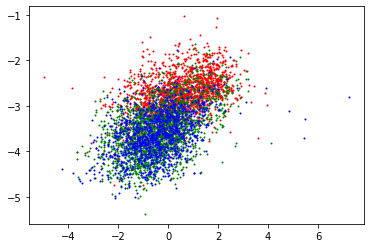

In [335]:
plt.scatter(x = I_table['x_axis'], y = I_table['y_axis'], s = 1, alpha = 1, color = 'red')
plt.scatter(x = C_table['x_axis'], y = C_table['y_axis'], s = 1, alpha = 1, color = 'green')
plt.scatter(x = N_table['x_axis'], y = N_table['y_axis'], s = 1, alpha = 1, color = 'blue')